## Single Layer Perceptron

### Setting up the libraries

In [19]:
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Flatten, Dense, Activation
import warnings
warnings.filterwarnings('ignore')

### Loading the dataset

In [20]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

### Anatomy

These are grayscale images and has a fixed size of 28x28 pixels. So, each image can be represented as a matrix of pixel values with dimensions 28x28, where each pixel value typically ranges from __0 to 255__ (0 being black and 255 being white in grayscale images)

Total data in x_train: 60000 and in x_test: 60000
Shape of Matrix: (28, 28)


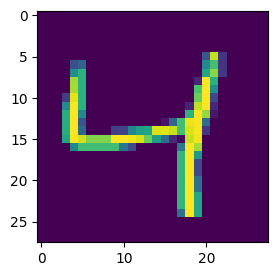

In [21]:
print(f"Total data in x_train: {len(x_train)} and in x_test: {len(x_train)}")

# Matrix of pixels shape: 28*28
print(f"Shape of Matrix: {x_train[0].shape}")

plt.figure(figsize=(3,3))
plt.imshow(x_train[2])
plt.show()

In [22]:
# Normalize the data, meaning, turning the values into the range of [0, 1]
norm_x_train = x_train/255
norm_x_test = x_test/255

# Flattening the data to a 1D array
x_train_flatten = norm_x_train.reshape(-1, 28*28)
x_test_flatten = norm_x_test.reshape(-1, 28*28) 

1. input_shape defines the shape of the input data that will be fed into the neural network. Here, __784 represents the total number of pixels in each image__ of the MNIST dataset, which is a flattened version of the original 28x28 images (28 * 28 = 784). The comma after 784 indicates that it's a tuple with one element. <br><br>
2. Sparse categorical crossentropy is suitable for integer-encoded target labels

In [23]:
input_shape = (784,)

model = keras.Sequential([
    keras.layers.Dense(10, input_shape=input_shape, activation='softmax')
])

model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

model.fit(x_train_flatten, y_train, epochs = 5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 431us/step - accuracy: 0.8078 - loss: 0.7339
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 431us/step - accuracy: 0.9129 - loss: 0.3115
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 406us/step - accuracy: 0.9209 - loss: 0.2847
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 414us/step - accuracy: 0.9235 - loss: 0.2703
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 396us/step - accuracy: 0.9269 - loss: 0.2657


In [24]:
model.evaluate(x_test_flatten, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step - accuracy: 0.9179 - loss: 0.3014


[0.2670023441314697, 0.9273999929428101]

## Multi-Layer Perceptron

In [25]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

Reason to convert the pixel values into float is because for the model to perform better calculations, it ensures the compatibility with the models' computations adn operations

In [26]:
# Converting the Pixels into floating points
X_train = X_train.astype('float32')
X_test = X_test.astype('float32') 

# Normalizing the Image Pixels from [0, 255] to [0, 1]
grayscale = 255
X_train /= grayscale
X_test /= grayscale

In [27]:
print(f"Feature Matrix: {X_train.shape}")
print(f"Target Matrix: {X_test.shape}")
print(f"Feature Matrix: {y_train.shape}")
print(f"Target Matrix: {y_test.shape}")

# Size of every Image is 28*28
print(f"Shape of Matrix: {X_train[0].shape}")

Feature Matrix: (60000, 28, 28)
Target Matrix: (10000, 28, 28)
Feature Matrix: (60000,)
Target Matrix: (10000,)
Shape of Matrix: (28, 28)


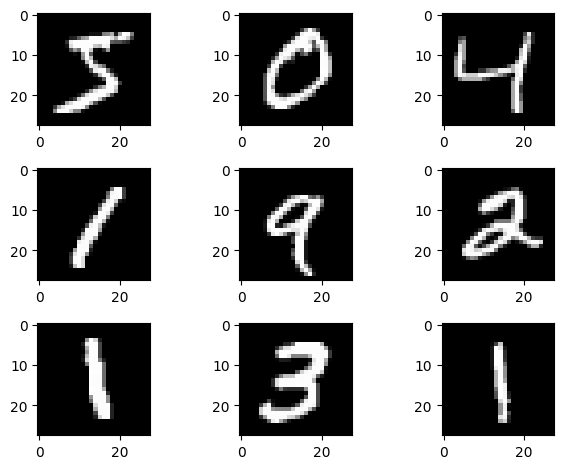

In [28]:
fig, ax = plt.subplots(3,3); k = 0
for i in range(3):
    for j in range(3):
        ax[i][j].imshow(X_train[k], cmap = 'gray')
        k += 1
        
plt.tight_layout()
plt.show()

In [29]:
model = keras.Sequential([
    
    # Reshape the input into 28*28 or it can be (784, )
    Flatten(input_shape=(28, 28)),
    
    # Dense Layer
    Dense(256, activation='relu'),
    
    # Dense Layer
    Dense(256, activation='relu'),
    
    # Output Layer
    Dense(10, activation='softmax')
])

In [30]:
model.compile(optimizer="adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

# Default Batch Size is 32
model.fit(X_train, y_train, epochs = 10, batch_size=2000, validation_split=0.2)

Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6245 - loss: 1.4614 - val_accuracy: 0.9016 - val_loss: 0.3362
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9033 - loss: 0.3327 - val_accuracy: 0.9332 - val_loss: 0.2332
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9346 - loss: 0.2299 - val_accuracy: 0.9463 - val_loss: 0.1929
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9474 - loss: 0.1847 - val_accuracy: 0.9541 - val_loss: 0.1629
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9549 - loss: 0.1575 - val_accuracy: 0.9579 - val_loss: 0.1464
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9614 - loss: 0.1377 - val_accuracy: 0.9613 - val_loss: 0.1335
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9671 - loss: 0.1141 - val_accuracy: 0.9628 - val_loss: 0.1250
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9719 - loss: 0.0989 - val_accuracy: 0.9672 - val_loss

In [31]:
results = model.evaluate(X_test, y_test)
print("test loss, test acc:", results)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 698us/step - accuracy: 0.9677 - loss: 0.1099
test loss, test acc: [0.09574582427740097, 0.9710999727249146]


### Choosing Optimal Number of Epochs to train a Neural Network ([Early Stopping](https://www.geeksforgeeks.org/regularization-by-early-stopping/))

In [55]:
import tensorflow 
from tensorflow.keras.utils import to_categorical
from keras.datasets import mnist
from keras import callbacks

In [42]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

- Previous Session: Focuses on data manipulation and normalization directly on the pixel values.
- Current Session: Focuses on reshaping the data arrays to conform to the required input format for Keras models.

In [44]:
print(f"Total data in train_images: {len(train_images)} and in test_images: {len(test_images)}")

Total data in train_images: 60000 and in test_images: 10000


In [45]:
train_images = train_images.reshape((60000, 28, 28, 1)) # (size, height, width, channel)
train_images = train_images.astype('float32') / 255     # Scaling down the pixel values (0,1)

test_images = test_images.reshape((10000, 28, 28, 1))   # (size, height, width, channel)
test_images = test_images.astype('float32') / 255       # Scaling down the pixel values (0,1)

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [53]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

In [54]:
model.compile(optimizer="adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [56]:
val_images = train_images[:10000]
partial_images = train_images[10000:]

val_labels = y_train[:10000]
partial_labels = y_train[10000:]

1. monitor: can be validation_loss or validation_accuracy
2. mode: mode in which change in the quantity monitored should be observed.
    - When the monitored value is loss, its value is ‘min’. 
    - When the monitored value is accuracy, its value is ‘max’. 
    - When the mode is set is ‘auto’, the function automatically monitors with the suitable mode.
3. patience: Number of epochs for the training to be continued after the first halt.
4. verbose: The way progress shall be displayed
    - 0: Nothing is displayed
    - 1: Bar depicting the progress of training is displayed.
    - 2: One line per epoch, showing the progress of training per epoch is displayed.

In [61]:
early_stopping = callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=4,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [62]:
history = model.fit(partial_images, partial_labels, epochs = 25, batch_size=128, validation_data=(val_images, val_labels), callbacks=[early_stopping])

Epoch 1/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9968 - loss: 0.0108 - val_accuracy: 0.9878 - val_loss: 0.0505
Epoch 2/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9973 - loss: 0.0083 - val_accuracy: 0.9890 - val_loss: 0.0464
Epoch 3/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9987 - loss: 0.0052 - val_accuracy: 0.9874 - val_loss: 0.0593
Epoch 4/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9984 - loss: 0.0058 - val_accuracy: 0.9880 - val_loss: 0.0468
Epoch 5/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9989 - loss: 0.0036 - val_accuracy: 0.9900 - val_loss: 0.0479
Epoch 6/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9982 - loss: 0.0055 - val_accuracy: 0.9879 - val_loss: 0.0561
Epoch 6: early stopping


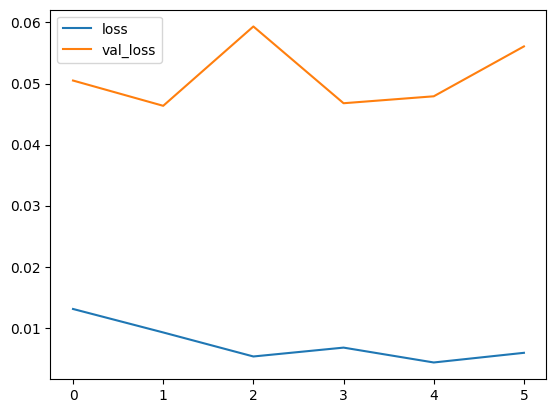

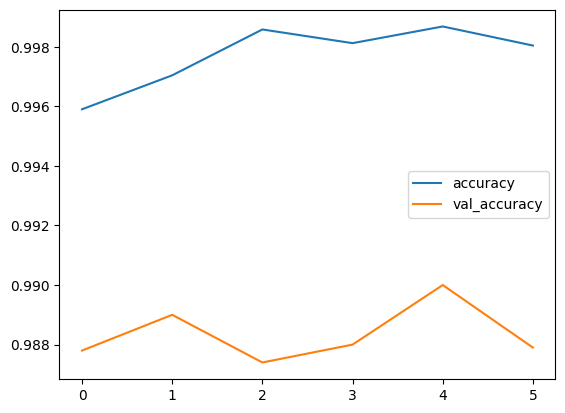

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

history_df = pd.DataFrame(history.history)
history_df[['loss', 'val_loss']].plot()
history_df[['accuracy', 'val_accuracy']].plot()
plt.show()


[Continue?](https://www.geeksforgeeks.org/choose-optimal-number-of-epochs-to-train-a-neural-network-in-keras/?ref=lbp)